In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from tkinter import *
from tkinter import ttk
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.datasets import mnist

# Read Data

In [2]:

(p_trainX, p_trainy), (p_testX, p_testy) = mnist.load_data()


# Visualize MNIST Dataset

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


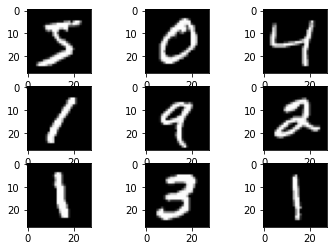

In [3]:
print('Train: X=%s, y=%s' % (p_trainX.shape, p_trainy.shape))
print('Test: X=%s, y=%s' % (p_testX.shape, p_testy.shape))

# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(p_trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# preprocessing

In [4]:
def preprocessing_MNIST():
    img_group_list = [p_trainX, p_testX]
    global p_trainy
    global p_testy
    n_values = int(np.max(p_trainy) + 1)
    p_trainy = np.eye(n_values)[p_trainy.astype(int)]
    

    n_values = int(np.max(p_testy) + 1)
    p_testy = np.eye(n_values)[p_testy.astype(int)]
    
    i = 0
    for img_group in img_group_list:
        imgs = []
        for img in img_group:

            img = np.array(img, dtype=np.float64)
            
            img = img.flatten()
            mean = img.mean()
            std = img.std()
            # img /= np.array([255])
            img -= mean
            img /= std
            imgs.append(img)
        
        img_group_list[i] = imgs.copy()
        i += 1

    return (np.array(img_group_list[0]), p_trainy), (np.array(img_group_list[1]), p_testy)

# GUI

In [5]:

classes=''
add_bias=True
def pick_dataset():
    global dataset
    dataset = datasets_combobox.get()
    print("Dataset: ", dataset)
    
    root2.destroy()

root2=Tk()
root2.title("Pick a dataset")

frame=Frame(root2)
frame.pack()

select_data=LabelFrame(frame,text="Select Dataset")
select_data.grid(row=0,column=0,padx=20,pady=10)

my_datasets = ["MNIST"]
datasets_combobox = ttk.Combobox(select_data, values=my_datasets)
datasets_combobox.grid(row=1,column=0)

button_dataset=Button(frame,text="Choose Dataset",command=pick_dataset)
button_dataset.grid(row=3,column=0,padx=20,pady=10)

root2.mainloop()

trainX = []
testX = []
trainy = []
testy = []
def enter_data():
    global new_data
    global learning_rate
    global hidden_layer_count
    global neurons_per_layer
    global epochs
    global add_bias
    global activation_func
    global trainX
    global testX
    global trainy
    global testy

    add_bias_string=statusvar.get()
    hidden_layer_count = int(hidden_layers_txt.get())
    neurons_per_layer = neurons_per_layer_txt.get().split(',')
    neurons_per_layer = [int(x) for x in neurons_per_layer]
    activation_func = activation_function_cmb.get()

    if add_bias_string=="true":
        add_bias=True
    else:
        add_bias=False
    learning_rate=learning_rate_entity.get()
    epochs=epochs_entity.get()
    
    if hidden_layer_count != len(neurons_per_layer):
        print(hidden_layer_count)
        print(len(neurons_per_layer))
        print("Invalid neurons to layer count")
        return

    print("Number of layers: ", hidden_layer_count)
    print("Neurons per layer: ", neurons_per_layer)
    print("Activation Function: ", activation_func)
    print(" learning_rate: ", str(learning_rate), " epochs: ", str(epochs))



    print("Preprocessing MNIST")
    (trainX, trainy), (testX, testy) = preprocessing_MNIST()
    print(" train data shape: ",trainX.shape)
    print("------------------------------------------")
    

root=Tk()
root.title('Backpropagation Multi-Layer Perceptron')

frame=Frame(root)
frame.pack()

select_data=LabelFrame(frame,text="Select Data")
select_data.grid(row=0,column=0,padx=20,pady=10)



learning_rate_label=Label(select_data,text="Learning Rate")
learning_rate_label.grid(row=0,column=0)

epochs_label=Label(select_data,text="Epochs")
epochs_label.grid(row=0,column=1)

select_hidden_layers = Label(select_data, text="Layers count")
select_hidden_layers.grid(row=0, column=2)

hidden_layers_txt = ttk.Entry(select_data)
hidden_layers_txt.grid(row=1, column=2)

learning_rate_entity=Entry(select_data)
learning_rate_entity.grid(row=1,column=0)

epochs_entity=Entry(select_data)
epochs_entity.grid(row=1,column=1)

for widget in select_data.winfo_children():
    widget.grid_configure(padx=10,pady=5)
    
bias_frame=LabelFrame(frame)
bias_frame.grid(row=1,column=0,sticky="news",padx=20,pady=10)

bias_label=Label(bias_frame,text="Bias")

statusvar=StringVar(value="false")
bias_check=Checkbutton(bias_frame,text="Add Bias",variable=statusvar,onvalue="true",offvalue="false")
bias_label.grid(row=0,column=0)
bias_check.grid(row=1,column=0)

neurons_per_layer_label = Label(bias_frame, text="Neurons Per Layer")
neurons_per_layer_label.grid(row=0, column=2, padx=40)

neurons_per_layer_txt = ttk.Entry(bias_frame)
neurons_per_layer_txt.grid(row=1, column=2, padx=40)

my_act_functions=['Sigmoid', 'Hyperbolic Tangent']
activation_function_label = Label(bias_frame, text="Activation Function")
activation_function_label.grid(row=0, column=3, padx=20)

activation_function_cmb = ttk.Combobox(bias_frame, values = my_act_functions)
activation_function_cmb.grid(row=1, column=3, padx=20)

button=Button(frame,text="Enter data",command=enter_data)
button.grid(row=3,column=0,padx=20,pady=10)
root.mainloop()

Dataset:  MNIST
Number of layers:  3
Neurons per layer:  [128, 64, 32]
Activation Function:  Sigmoid
 learning_rate:  0.1  epochs:  128
Preprocessing MNIST
 train data shape:  (60000, 784)
------------------------------------------


In [6]:
np.array(trainy).shape


(60000, 10)

# Create Single layer Perceptron 

In [7]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))
    

In [8]:
def tanh(z):   
    return  (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

In [9]:
def initWeights (X, Y, hidden_layer_count, neurons_per_layer, add_bias):
    
    Weights = []
    weightsIN = np.random.randn(X.shape[1], neurons_per_layer[0])* (1/np.sqrt(X.shape[1] * neurons_per_layer[0]))
    Weights.append(weightsIN)
    for i in range(hidden_layer_count-1):
        weightH = np.random.randn(neurons_per_layer[i], neurons_per_layer[i+1])* (1/ np.sqrt(neurons_per_layer[i] * neurons_per_layer[i+1]))
        Weights.append(weightH)
    weightsOUT = np.random.randn(neurons_per_layer[hidden_layer_count-1], Y.shape[1])* (1/ np.sqrt(neurons_per_layer[hidden_layer_count-1] * Y.shape[1]))
    Weights.append(weightsOUT)
    
    
    Baises = []
    if add_bias:
        bais = 1
        for i in range(hidden_layer_count):
            b = np.random.randn(neurons_per_layer[i], 1)
            Baises.append(b)
        bout = np.random.randn(Y.shape[1], 1)
        Baises.append(bout)
    else:
        for i in range(hidden_layer_count):
            b = np.zeros((neurons_per_layer[i], 1))
            Baises.append(b)
        bout = np.zeros((Y.shape[1], 1))
        Baises.append(bout)
    
    return (Weights, Baises)

In [10]:
def forwordProp(X, weights, activation_func, add_bias, hidden_layer_count):
    A = []
    # if add_bias:
    W = weights[0]
    B = weights[1]
      
    A.append(X)
    m = X.shape[0]     
    for i in range(0, hidden_layer_count):

        a = A[i]

        zh= np.matmul(a, W[i])+B[i].T
        if activation_func == "Sigmoid":
            ah = sigmoid(zh)
        else:    
            ah = tanh(zh)

        A.append(ah)
    

    a = A[hidden_layer_count]
    zout= np.matmul(a, W[hidden_layer_count])+B[hidden_layer_count].T
    if activation_func == "Sigmoid":
        aout = sigmoid(zout)
    else:    
        aout = tanh(zout)
    A.append(aout)
    return A


In [19]:
def backProp(A, Y_out, weights, activation_func, hidden_layer_count, learning_rate, add_bias):
    
    Ds = []
    m = Y_out.shape[0]
    W = weights[0]
    B = weights[1]
    
    
    """delta out"""
    a =  A[len(A)-1]
    dout =  a - Y_out 
    if activation_func == "Sigmoid":
        dout *= a*(1-a)
    else:
        dout *= (1-np.power(a, 2))   
    Ds.append(dout)
    
    """delta hidden layers"""
    for i in range(hidden_layer_count, 0, -1):
        k = hidden_layer_count - i
        a = A[i]
         
        dh= np.matmul(Ds[k] ,W[i].T) 
        if activation_func == "Sigmoid":
            dh *= a*(1-a)
        else:
            dh *= (1-np.power(a, 2))   
        Ds.append(dh)
        
    Ds.reverse()
 
    """update weights"""
    for i in range(hidden_layer_count, -1, -1):
        a = A[i]
        # if add_bias:
        #     a = np.hstack([np.ones([A[i].shape[0],1]), A[i]])
        W[i] -= float(learning_rate) * (np.matmul(a.T,Ds[i]))
             
    """update baises""" 
    if add_bias:
        for i in range(hidden_layer_count, -1, -1):
            a = A[i]
            d = np.reshape(np.sum(Ds[i],axis=0),(-1,1))
            # print(d.shape)
            B[i] -= float(learning_rate) * (d)
            
            
                      
    return (W,B)

In [20]:
def loss_function(y_output, y_label):
    return (0.5 * (y_label - y_output)**2).mean()

In [21]:
np.random.seed(50)
def train(x_train,y_train,learning_rate,epoch,activation_func, add_bias, hidden_layer_count, neurons_per_layer):        
    x=np.array(x_train)
    y=np.array(y_train)
    # print("x.shape",x.shape)
    
    weights = initWeights (x, y, hidden_layer_count, neurons_per_layer, add_bias,)
    A=[]
    m = x.shape[0]
    
    for j in range(int(epoch)):         
        for j in range(1000): 
            m1 = int(j * (0.001*m))
            m2 = int((j+1) * (0.001*m))
            A = forwordProp(x[m1:m2,:], weights, activation_func, add_bias, hidden_layer_count)
            
            weights = backProp(A, y_train[m1:m2,:], weights, activation_func, hidden_layer_count, learning_rate, add_bias)
            # print('Epoch'+str(j)+': '+str(weights)+' Loss: '+str(loss))
    # total_loss= loss_function(A[len(A)-1], y_train)      
    return weights 
        

In [22]:
def score(y_prediction, y_label):
    correct=0
    for i in range(y_label.shape[0]):
        yp = np.argmax(y_prediction[i,:])
        yl =  np.argmax(y_label[i,:])
        if yp == yl:
            correct += 1
    return (correct/y_label.shape[0])*100


# Train & Test

In [25]:
weights = train(trainX,trainy,learning_rate,epochs,activation_func, add_bias, hidden_layer_count, neurons_per_layer)
# weights = train(trainX,trainy,0.05,128,activation_func, add_bias,3,[128,64,32,])  

In [26]:
result1=forwordProp(trainX,weights,activation_func, add_bias, 3)
s1 = score(result1[len(result1)-1],trainy)
result2=forwordProp(testX,weights,activation_func, add_bias, 3)
s2 = score(result2[len(result2)-1],testy)

print(s1, s2)



99.75333333333334 97.36


In [27]:
imgs = np.reshape(trainX,(-1,28,28))
imgs.shape

(60000, 28, 28)

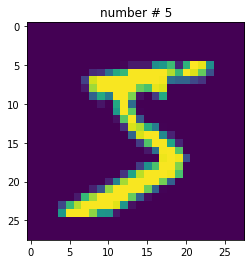

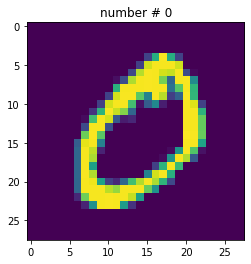

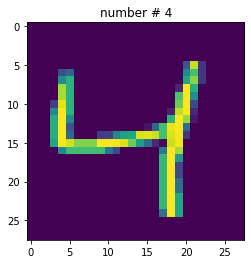

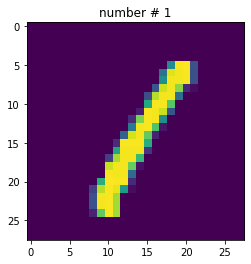

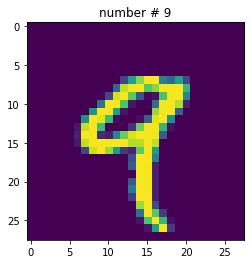

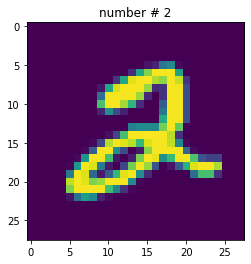

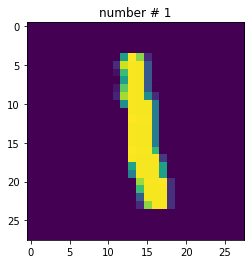

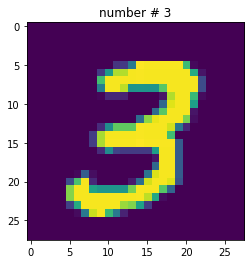

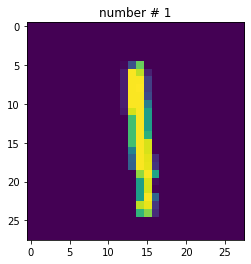

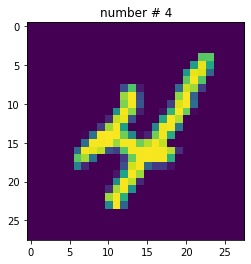

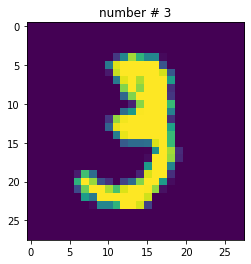

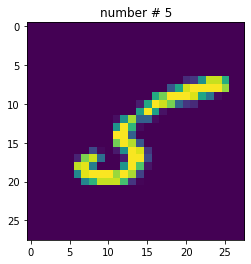

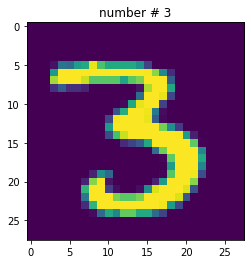

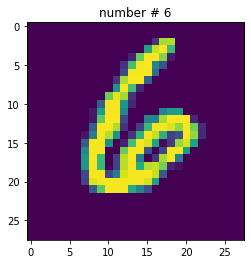

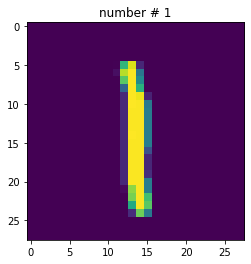

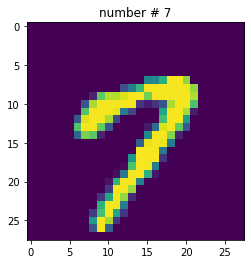

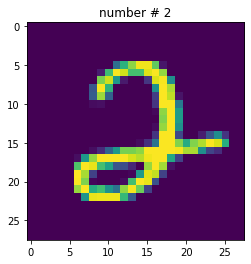

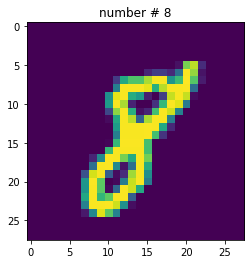

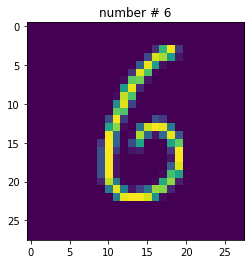

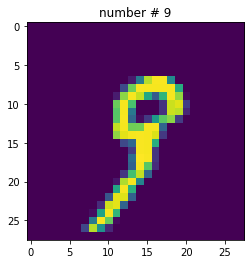

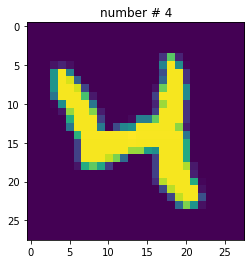

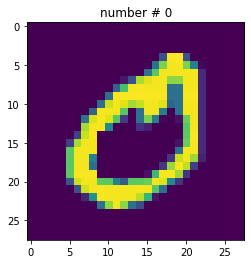

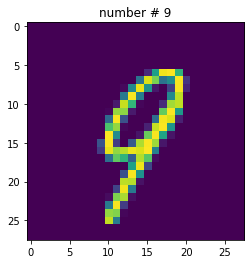

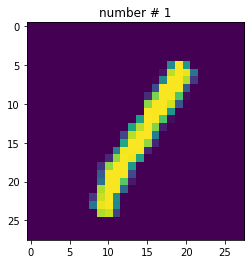

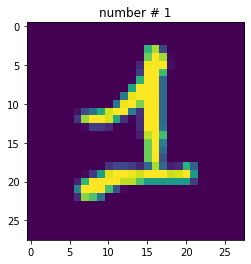

In [28]:

for i in range(25):
    plt.imshow(imgs[i])
    plt.title(f"number # {np.argmax(result1[len(result1)-1][i,:])}")
    plt.show()